In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
users = pd.read_csv('u.user', delimiter='|')

users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Question 1

In [3]:
occupation_group = users.groupby(['occupation'])
occupation_group['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
occupation_group_gender = users[users['gender'] == 'M'].groupby(['occupation'])['gender']
(occupation_group_gender.count()/len(users[users['gender'] == 'M'])*100).sort_values(ascending=False)

occupation
student          20.298507
other            10.298507
educator         10.298507
engineer          9.701493
programmer        8.955224
administrator     6.417910
executive         4.328358
scientist         4.179104
technician        3.880597
writer            3.880597
librarian         3.283582
marketing         2.388060
entertainment     2.388060
artist            2.238806
retired           1.940299
lawyer            1.492537
salesman          1.343284
doctor            1.044776
none              0.746269
healthcare        0.746269
homemaker         0.149254
Name: gender, dtype: float64

In [5]:
occupation_group['age'].agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [6]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

## Question 2

In [7]:
euro12 = pd.read_csv('Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [8]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [9]:
print("No of teams participated: ", len(euro12['Team'].unique()))

No of teams participated:  16


In [10]:
print("No. of columns for the table:", len(euro12.columns))

No. of columns for the table: 35


In [11]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [12]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [13]:
discipline.groupby(['Team'])['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [14]:
euro12[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [15]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [16]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [17]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [18]:
euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

In [19]:
a = pd.Series(np.random.randint(1, 4, 100))
b = pd.Series(np.random.randint(1, 3, 100))
c = pd.Series(np.random.randint(10000, 30000, 100))

In [20]:
df = pd.DataFrame(
    {
        'bedrs': a,
        'bathrs': b,
        'price_sqr_meter': c
    }
)
df.head()

,bedrs,bathrs,price_sqr_meter
0,2,1,26268
1,2,2,10525
2,3,2,23921
3,3,2,11781
4,1,1,19269


In [21]:
df = pd.DataFrame({
    'bigcolumn': pd.concat((a,b,c))
})

df.head()

,bigcolumn
0,2
1,2
2,3
3,3
4,1


In [22]:
df

,bigcolumn
0,2
1,2
2,3
3,3
4,1
...,...
95,21955
96,16319
97,22689
98,17613


In [23]:
df.reset_index()

,index,bigcolumn
0,0,2
1,1,2
2,2,3
3,3,3
4,4,1
...,...,...
295,95,21955
296,96,16319
297,97,22689
298,98,17613


## Question 4

In [63]:
data = pd.read_csv('wind.data', sep=' ')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [64]:
data.index = [np.datetime64("%d-%02d-%02d"%(i,j,k), 'D') for i,j,k in data[['Yr', 'Mo', 'Dy']].values]

In [65]:
data.index = [np.datetime64("20%d-%02d-%02d"%(i,j,k), 'D') if i<25 else np.datetime64("19%d-%02d-%02d"%(i,j,k), 'D') for i,j,k in data[['Yr', 'Mo', 'Dy']].values]

In [66]:
data = data.drop(columns=['Yr', 'Mo', 'Dy'])

In [67]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [68]:
data.isnull().sum(axis=0)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [69]:
data.notnull().sum(axis=0)

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [70]:
data = data.dropna(axis=0)

In [75]:
data.mean(axis=0).mean()

10.222465245951712

In [74]:
loc_stats = data.agg(['min', 'max', 'mean'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129


In [76]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
day_stats

,min,max,mean,std
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


In [80]:
data[data.index.month == 1].mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [85]:
data.resample('Y').first()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-12-31,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1962-12-31,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92
1963-12-31,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13
1964-12-31,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00
1965-12-31,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41
1966-12-31,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79
1967-12-31,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91
1968-12-31,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29
1969-12-31,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71
1970-12-31,9.59,2.96,11.79,3.42,6.13,4.08,9.00,4.46,7.29,3.50,7.33,13.00


In [86]:
data.resample('M').first()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-02-28,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00
1961-03-31,12.58,10.04,11.17,7.12,10.29,9.21,10.88,10.50,10.58,12.96,18.38,13.79
1961-04-30,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17
1961-05-31,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00
1978-09-30,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96
1978-10-31,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09
1978-11-30,13.59,16.75,11.25,7.08,11.04,8.33,8.17,11.29,10.75,11.25,23.13,25.00


In [87]:
data.resample('W').first()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-08,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-15,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
1961-01-22,16.42,11.25,15.67,4.71,11.34,6.92,9.25,8.79,8.21,7.33,13.04,9.04
1961-01-29,16.54,9.96,18.54,10.46,13.50,12.67,13.70,13.75,10.75,13.17,14.79,20.58
1961-02-05,12.21,11.42,10.92,7.92,13.08,9.62,14.50,10.21,9.92,11.96,18.88,19.25
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,9.08,6.50,8.21,1.67,6.71,1.00,2.33,2.04,1.29,3.29,7.04,13.42
1978-12-10,9.92,13.50,7.21,1.71,11.00,7.50,8.38,7.46,10.79,10.21,17.88,17.96
1978-12-17,20.25,19.17,17.83,11.63,17.79,13.37,14.83,13.88,15.54,16.29,18.34,22.83
1978-12-24,9.83,10.88,8.50,1.00,9.08,6.00,2.42,8.25,4.42,5.88,19.79,19.79


In [93]:
data[data.index.isin(pd.date_range('1961-01-02', freq='W', periods=52))].agg(['min', 'max', 'mean', 'std'])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,3.040000,2.750000,4.210000,1.710000,4.460000,1.870000,2.210000,2.620000,2.880000,3.790000,4.210000,3.330000
max,25.800000,21.500000,22.420000,16.080000,23.160000,16.880000,21.170000,18.050000,18.460000,20.040000,26.630000,26.580000
mean,12.071042,10.042292,10.902500,6.554583,10.785625,7.421250,9.440833,8.832708,8.332708,9.411250,13.123125,12.908750
std,5.366996,4.441476,4.462751,3.425024,4.541975,3.568071,4.325322,3.862566,3.694023,3.881178,5.174791,5.412929


## Question 5

In [94]:
chipo = pd.read_csv('chipotle.tsv', sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [95]:
print("No. of observation:", len(chipo))

No. of observation: 4622


In [96]:
print("No. of columns:", len(chipo.columns))

No. of columns: 5


In [97]:
print("Columns Name:", ", ".join(list(chipo.columns)))

Columns Name: order_id, quantity, item_name, choice_description, item_price


In [98]:
print("The most ordered item is", chipo.groupby('item_name')['quantity'].count().sort_values(ascending=False).index[0])

The most ordered item is Chicken Bowl


In [99]:
print("The number of times most item ordered is", chipo.groupby('item_name')['quantity'].count().sort_values(ascending=False).values[0])

The number of times most item ordered is 726


In [102]:
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype('float')

In [113]:
print(f"Total revenue: {chipo['item_price'].sum()}")

Total revenue: 34500.16


In [112]:
print(f"No of order made: {chipo['order_id'].max()}")

No of order made: 1834


In [111]:
print("Average revenue per order: ")
chipo.groupby('order_id')['item_price'].mean()

Average revenue per order: 


order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [110]:
print(f"Different items sold: {len(chipo['item_name'].unique())}")

Different items sold: 50


## Question 6

In [129]:
import matplotlib.pyplot as plt

In [127]:
marriages = pd.read_csv("us-marriages-divorces-1867-2014.csv")
marriages.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


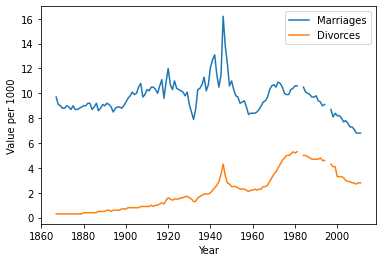

In [138]:
plt.plot(marriages['Year'], marriages['Marriages_per_1000'])
plt.plot(marriages['Year'], marriages['Divorces_per_1000'])
plt.legend(['Marriages', 'Divorces'])
plt.xlabel('Year')
plt.ylabel('Value per 1000')
plt.show()

## Question 7

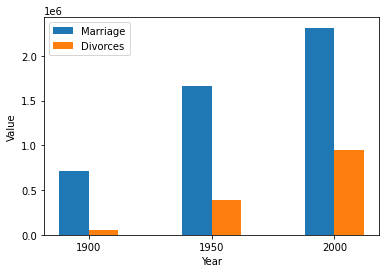

In [177]:
marriage_plot_data, divorces_plot_data = marriages[marriages['Year'].isin([1900, 1950, 2000])][['Marriages', 'Divorces']].values.T
plt.bar(np.array([1900, 1950, 2000]), marriage_plot_data, width=12, align='center')
plt.bar(np.array([1900, 1950, 2000])+12, divorces_plot_data, width=12, align='center')
plt.xticks(np.array([1900, 1950, 2000])+6, ['1900', '1950', '2000'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(['Marriage', 'Divorces'])
plt.show()

## Question 8

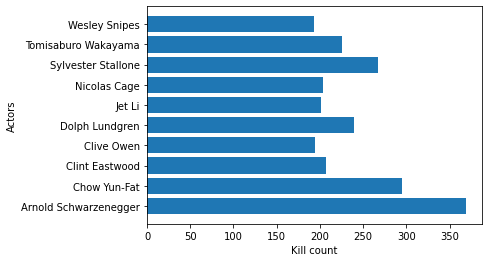

In [166]:
actors = pd.read_csv('actor_kill_counts.csv')

plt.barh(actors['Actor'], actors['Count'])
plt.xlabel('Kill count')
plt.ylabel('Actors')
plt.show()

## Question 9

In [169]:
romans = pd.read_csv("roman-emperor-reigns.csv")
romans.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


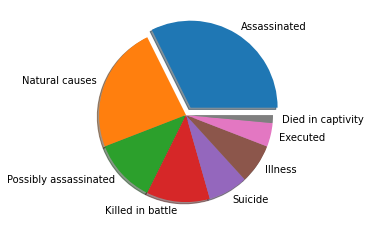

In [200]:
desired_data = romans['Cause_of_Death'].value_counts()
sizes = desired_data.values
labels = desired_data.index
explode = [0 if i!= 'Assassinated' else 0.1 for i in labels]

plt.pie(sizes, explode=explode, labels=labels, shadow=True)
plt.show()

## Question 10

In [181]:
revenue = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

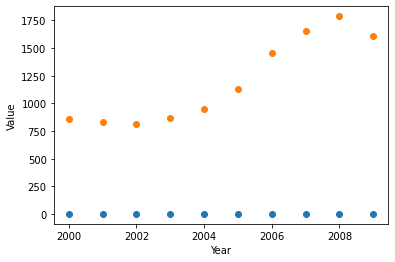

In [186]:
plt.scatter(revenue['Year'], revenue['Total Arcade Revenue (billions)'])
plt.scatter(revenue['Year'], revenue['Computer Science Doctorates Awarded (US)'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()